# Вариант 3 Алгоритмы Хэширования
Простая и сложная хэш-функции

In [2]:
import random
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

In [3]:
sizes_of_dataset = np.array(
    [100, 500, 1000, 5000, 10000, 30000, 50000, 100000]) #размер данных

## Класс и перегрузка операторов 

In [12]:
#Класс
class Accounting:
    """ 
    Класс для составления массив данных бухгалтерии.
      
    Attributes:  
        Name (str): ФИО служащего
        Position (str): Должность
        Place (str): Подразделение
        Salary (int): Зарплата
    """
    def __init__(self, name, position, place, salary):
        self.name = name
        self.position = position
        self.place = place
        self.salary = salary
    def __eq__(self, other):
        if self.name == other:
            return True
        return False

    def __gt__(self, other):
        if self.name >= other:
            return True
        return False

    def __ge__(self, other):
        if self.name > other:
            return True
        return False

    def __le__(self, other):
        if self.name < other:
            return True
        return False

    def __lt__(self, other):
        if self.name <= other:
            return True
        return False

    def __repr__(self):
        return '%r' % self.__dict__

## Алгоритмы поиска и сортировки 

In [17]:
def binsearch(data, strop):
    if len(data) == 0:
        return 0
    middle = len(data) // 2
    if data[middle] == strop:
        return(data[middle])
    if data[middle] >= strop:
        binsearch(data[:middle], strop)
    if data[middle] <= strop:
        binsearch(data[middle + 1:], strop)
def linearsearch(data, strop):
    """ Алгоритм линейного  поиска
        data - массив данных
        strop - искомый элемент
        linearsearch(data,strop) -> None
    """
    for i in data:
        if i == strop:
            return i
        

    
def merge_sort(data):
    if len(data) > 1:
        middle = len(data) // 2
        lefthalf = data[:middle]
        righthalf = data[middle:]
        merge_sort(lefthalf)
        merge_sort(righthalf)
        i = 0
        j = 0
        count = 0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                data[count] = lefthalf[i]
                i = i + 1
            else:
                data[count] = righthalf[j]
                j = j + 1
            count = count + 1

        while i < len(lefthalf):
            data[count] = lefthalf[i]
            i = i + 1
            count = count + 1

        while j < len(righthalf):
            data[count] = righthalf[j]
            j = j + 1
            count = count + 1
    return data

## Алгоритмы хэширования 

In [18]:
def easy_hash(stroka, p=67):
        """функция получения хэша строки (p=67)"""
        curr_hash = ord(stroka[0])
        for i in range(1, len(stroka)):
            curr_hash += (ord(stroka[i])) * (p**i)
        return curr_hash
    
def ly(stroka):
        """хэш - функция ly"""
        curr_hash = 0
        for i in range(0,len(stroka)):
            curr_hash = (curr_hash * 1664525) + ord(stroka[i]) * 1013904223
        return curr_hash

## Хэш - таблица 

In [25]:
class HashTable():
    """Хэш - таблица
      hashtable - таблица
      number_of_collisions - счетчик коллизий
    """
    def __init__(self):
        self.hashtable = defaultdict(list)
        self.number_of_collisions = 0
        
    def add_easy_hash(self, object):
        """Добавление простого хэша в таблицу
           object: Экземпляр класса Accounting
        """
        if easy_hash(object.name) in self.hashtable:
            self.number_of_collisions+=1
        self.hashtable[easy_hash(object.name)].append(object)

    def add_hard_hash(self, object):
        """Добавление сложного хэша в таблицу
           object: Экземпляр класса Accounting
        """
        if ly(object.name) in self.hashtable:
            self.number_of_collisions +=1
        self.hashtable[ly(object.name)].append(object)

    def search(self, hashing):
        """Поиск по хэш - таблице
           hashing - искомый ключ
        """
        return self.hashtable[hashing]

## Создание хэш - таблицы и поиск

In [20]:

binsearch_in_unsorted,list_of_classes,list_of_collisions_easy,time_list_easy,time_list_hard,\
list_of_collisions_hard,binsearch_in_sorted,linear_search_time =[],[], [],[],[],[],[],[]

for hashs in ['easy', 'ly']:
    for size_of_data in sizes_of_dataset:
        df = pd.read_csv(f'Data/dataset{size_of_data}.csv', encoding='cp1251')
        findings = random.choice(df['ФИО'])
        for i in range(1, len(df)):
            strin = df.iloc[i]
            list_of_classes.append(
                Accounting(name=strin['ФИО'],
                           position=strin['Должность'],
                           place=strin['Подразделение'],
                           salary=strin['Зарплата']))

        z = HashTable()
        if hashs == 'easy':
            for i in list_of_classes:
                z.add_easy_hash(i)
            current_hash = easy_hash(findings)
            start_time = time.time()
            hash_to_find = z.search(current_hash)
            zx = time.time() - start_time
            print(f'Датафрейм объема {size_of_data}, ищем {findings}'.center(
                80, '-'))
            print(f'Hash function: {hashs}, {hash_to_find} ')
            list_of_collisions_easy.append(z.number_of_collisions)
            time_list_easy.append(zx)
        y = HashTable()
        if hashs == 'ly':
            for i in list_of_classes:
                y.add_hard_hash(i)
            current_hash = ly(findings)
            start_time = time.time()
            hash_to_find = y.search(current_hash)
            zx = time.time() - start_time
            print(f'Датафрейм объема {size_of_data}, ищем {findings}'.center(
                80, '-'))
            print(f'Hash function: {hashs}, {hash_to_find} ')
            list_of_collisions_hard.append(z.number_of_collisions)
            time_list_hard.append(zx)
            start_time = time.time()
            list_of_classes_sorted = merge_sort(list_of_classes)
            binsearch(list_of_classes, findings)
            zx = time.time() - start_time
            binsearch_in_unsorted.append(zx)

            start_time = time.time()
            linearsearch(list_of_classes, findings)
            zy = time.time() - start_time
            linear_search_time.append(zy)

            start_time = time.time()
            binsearch(list_of_classes_sorted, findings)
            zz = time.time() - start_time
            binsearch_in_sorted.append(zz)

--------------Датафрейм объема 100, ищем Мишина Митофан Гордеевич---------------
Hash function: easy, [{'name': 'Мишина Митофан Гордеевич', 'position': 'senior', 'place': 'wpbcj', 'salary': 20647}] 
-------------Датафрейм объема 500, ищем Костина Борислав Борисовна--------------
Hash function: easy, [{'name': 'Костина Борислав Борисовна', 'position': 'senior', 'place': 'prrdk', 'salary': 18714}] 
-------------Датафрейм объема 1000, ищем Фокина Мстислав Феликсович-------------
Hash function: easy, [{'name': 'Фокина Мстислав Феликсович', 'position': 'junior', 'place': 'kkcpj', 'salary': 47054}] 
-------------Датафрейм объема 5000, ищем Мартынов Вацлав Игнатьевич-------------
Hash function: easy, [{'name': 'Мартынов Вацлав Игнатьевич', 'position': 'junior', 'place': 'elhaz', 'salary': 38268}] 
------------Датафрейм объема 10000, ищем Соловьев Еремей Харламович-------------
Hash function: easy, [{'name': 'Соловьев Еремей Харламович', 'position': 'senior', 'place': 'mqbdh', 'salary': 36684}

## Графики скорости выполнения 

Text(0.5, 1.0, 'Сравнение скорости поиска в зависимости от объема данных')

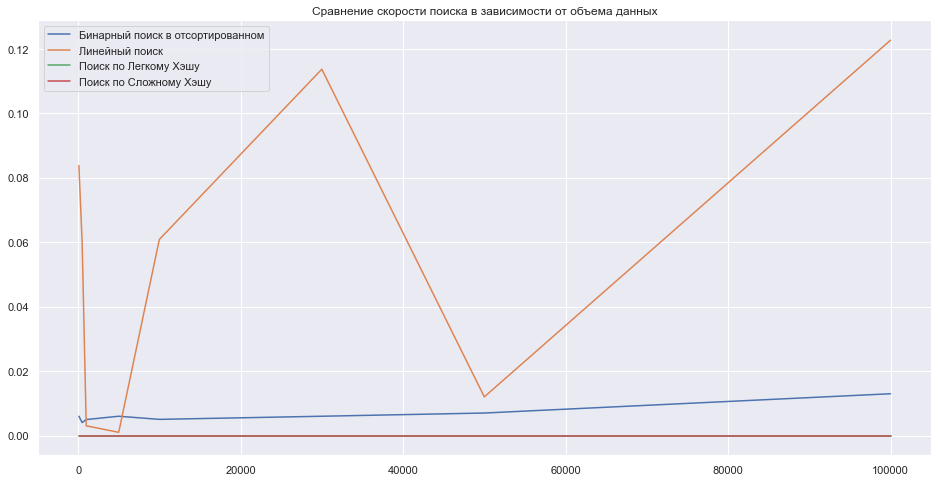

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(sizes_of_dataset,
        binsearch_in_sorted,
        label='Бинарный поиск в отсортированном')
ax.plot(sizes_of_dataset, linear_search_time, label='Линейный поиск')
ax.plot(sizes_of_dataset,time_list_easy, label = 'Поиск по Легкому Хэшу')
ax.plot(sizes_of_dataset,time_list_hard, label = 'Поиск по Сложному Хэшу')
ax.legend()
ax.set_title('Сравнение скорости поиска в зависимости от объема данных')


## Сравнение количества коллизий 

Text(0.5, 1.0, 'Сравнение количества колизий в зависимости от объема данных')

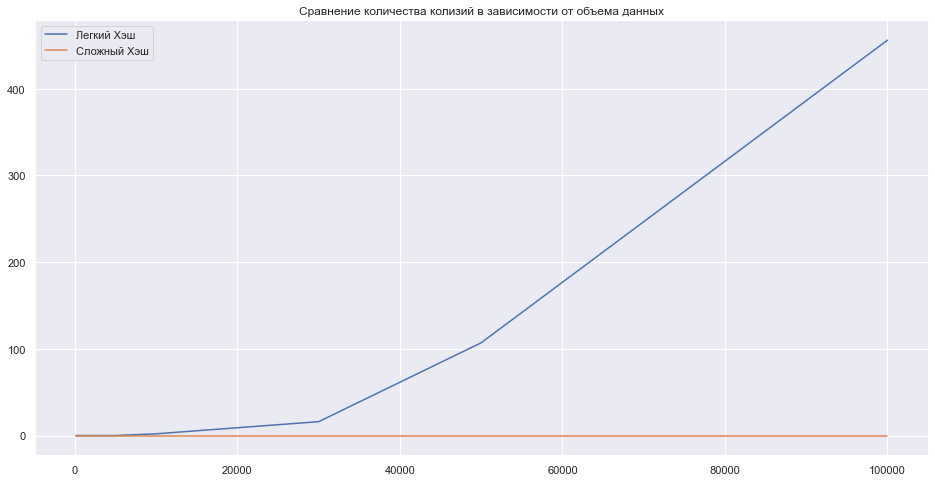

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sizes_of_dataset,list_of_collisions_easy, label = 'Легкий Хэш')
ax.plot(sizes_of_dataset,list_of_collisions_hard, label = 'Сложный Хэш')
ax.legend()
ax.set_title('Сравнение количества колизий в зависимости от объема данных')